In [1]:
import pandas as pd

data = "https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json"
dados = pd.read_json(data)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
#verificando os tipos dos dados disponíveis a partir do dado na primeira informação em cada coluna. 
for column in dados.columns:
    print(column, type(dados[column][0]))

customerID <class 'str'>
Churn <class 'str'>
customer <class 'dict'>
phone <class 'dict'>
internet <class 'dict'>
account <class 'dict'>


In [3]:
#verificando as keys dos dicts
for key in ['customer', 'phone', 'internet', 'account']:
    print(dados[key][0].keys())

dict_keys(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure'])
dict_keys(['PhoneService', 'MultipleLines'])
dict_keys(['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])
dict_keys(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges'])


In [4]:
normal_customer = pd.json_normalize(data=dados['customer'], sep='_')
normal_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
#separando os dicts

for dict in ['customer', 'phone', 'internet', 'account']:
    dict_normal = pd.json_normalize(data=dados[dict], sep='_')
    dados = pd.concat([dados, dict_normal], axis=1)
    
dados.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
dados.drop(['customer', 'phone', 'internet', 'account'], inplace=True, axis=1)

In [7]:
for column in dados.columns:
    print(column, type(dados[column][0]))

customerID <class 'str'>
Churn <class 'str'>
gender <class 'str'>
SeniorCitizen <class 'numpy.int64'>
Partner <class 'str'>
Dependents <class 'str'>
tenure <class 'numpy.int64'>
PhoneService <class 'str'>
MultipleLines <class 'str'>
InternetService <class 'str'>
OnlineSecurity <class 'str'>
OnlineBackup <class 'str'>
DeviceProtection <class 'str'>
TechSupport <class 'str'>
StreamingTV <class 'str'>
StreamingMovies <class 'str'>
Contract <class 'str'>
PaperlessBilling <class 'str'>
PaymentMethod <class 'str'>
Charges_Monthly <class 'numpy.float64'>
Charges_Total <class 'str'>


In [8]:
strings = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
          'PaperlessBilling', 'PaymentMethod']
for values in strings:
    print(dados[values].value_counts())

Male      3675
Female    3592
Name: gender, dtype: int64
No     3749
Yes    3518
Name: Partner, dtype: int64
No     5086
Yes    2181
Name: Dependents, dtype: int64
Yes    6560
No      707
Name: PhoneService, dtype: int64
No                  3495
Yes                 3065
No phone service     707
Name: MultipleLines, dtype: int64
Fiber optic    3198
DSL            2488
No             1581
Name: InternetService, dtype: int64
No                     3608
Yes                    2078
No internet service    1581
Name: OnlineSecurity, dtype: int64
No                     3182
Yes                    2504
No internet service    1581
Name: OnlineBackup, dtype: int64
No                     3195
Yes                    2491
No internet service    1581
Name: DeviceProtection, dtype: int64
No                     3582
Yes                    2104
No internet service    1581
Name: TechSupport, dtype: int64
No                     2896
Yes                    2790
No internet service    1581
Name: StreamingTV

In [9]:
#11 desses dados não possuem valor.
dados.query("Charges_Total == ' '")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [10]:
#Charges Total não devira ser str, vamos converter em float.
#Existem dados faltantes, vamos utilizar coerce para transformar os erros em NaN.

print(type(dados['Charges_Total'][0]))

dados['Charges_Total'] = pd.to_numeric(dados['Charges_Total'], errors='coerce')

print(type(dados['Charges_Total'][0]))

<class 'str'>
<class 'numpy.float64'>


In [11]:
#Confirmando que somente os 11 vazios foram convertidos em NaN
print(dados['Charges_Total'].isna().sum())

11


In [12]:
#Verificando NaN no dataset
for valor in dados.columns:
    print(valor, dados[valor].isna().sum())

customerID 0
Churn 0
gender 0
SeniorCitizen 0
Partner 0
Dependents 0
tenure 0
PhoneService 0
MultipleLines 0
InternetService 0
OnlineSecurity 0
OnlineBackup 0
DeviceProtection 0
TechSupport 0
StreamingTV 0
StreamingMovies 0
Contract 0
PaperlessBilling 0
PaymentMethod 0
Charges_Monthly 0
Charges_Total 11


In [13]:
#Como é um dataset com mais de 7000 entradas e esses 11 valores parecem não ter sido colocados por erro, 
#iremos tirar esses 11.
print(dados.shape[0])
dados.dropna(inplace=True)
print(dados.shape[0])

7267
7256


Vamos traduzir o dataframe

In [14]:
print(dados.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')


In [15]:
#Começando por renomear as colunas (churn é um termo importado e não será mudado)
dados.rename(columns={'customerID': 'ID_Cliente', 'gender': 'Genero', 'SeniorCitizen': 'E_Idoso',
                     'Partner': 'Tem_Parceiro', 'Dependents': 'Tem_Dependentes', 'tenure': 'Tempo_de_Posse',
                     'PhoneService': 'Tem_Servico_Telefone', 'MultipleLines': 'Tem_Multiplas_Linhas',
                     'InternetService': 'Tem_Servico_Internet', 'OnlineSecurity': 'Tem_Servico_Seguranca_Online',
                     'OnlineBackup': 'Tem_Backup_Online', 'DeviceProtection': 'Tem_Protecao_Aparelho',
                     'TechSupport': 'Tem_Suporte_Tecnico', 'StreamingTV': 'Tem_Tv_Streaming', 'StreamingMovies': 'Tem_Filmes_Streaming',
                     'Contract': 'Contrato', 'PaperlessBilling': 'Cobranca_Sem_Papel', 'PaymentMethod': 'Metodo_de_Pagamento',
                     'Charges_Monthly': 'Cobra_Mensalmente', 'Charges_Total': 'Cobranca_Total'}, inplace=True)
print(dados.columns)

Index(['ID_Cliente', 'Churn', 'Genero', 'E_Idoso', 'Tem_Parceiro',
       'Tem_Dependentes', 'Tempo_de_Posse', 'Tem_Servico_Telefone',
       'Tem_Multiplas_Linhas', 'Tem_Servico_Internet',
       'Tem_Servico_Seguranca_Online', 'Tem_Backup_Online',
       'Tem_Protecao_Aparelho', 'Tem_Suporte_Tecnico', 'Tem_Tv_Streaming',
       'Tem_Filmes_Streaming', 'Contrato', 'Cobranca_Sem_Papel',
       'Metodo_de_Pagamento', 'Cobra_Mensalmente', 'Cobranca_Total'],
      dtype='object')


In [16]:
dados.Cobra_Mensalmente.value_counts()

20.05     65
19.90     46
19.55     45
19.85     45
19.95     44
          ..
23.45      1
116.55     1
106.85     1
68.55      1
67.85      1
Name: Cobra_Mensalmente, Length: 1584, dtype: int64

In [17]:
#Traduzir resultados 
dados.replace('Yes', 1, inplace=True)
dados.replace('No', 0, inplace=True)
dados.replace('Female', 0, inplace=True)
dados.replace('Male', 1, inplace=True)
dados.replace('Fiber optic', 1, inplace=True)
dados.replace('DSL', 2, inplace=True)
dados.replace('No phone service', 999, inplace=True)
dados.replace('No internet service', 999, inplace=True)
dados.replace('Month-to-month', 0, inplace=True)
dados.replace('Two year', 2, inplace=True)
dados.replace('One year', 1, inplace=True)
dados.replace('Electronic check', 0, inplace=True)
dados.replace('Mailed check', 1, inplace=True)
dados.replace('Bank transfer (automatic)', 2, inplace=True)
dados.replace('Credit card (automatic)', 3, inplace=True)

In [18]:
#Vamos criar uma coluna com os gastos diários de cada indivíduo baseando-se no gasto mensal
dados['Gastos_Diarios'] = (dados['Cobra_Mensalmente']/30).round(2)
dados['Gastos_Diarios']

0       2.19
1       2.00
2       2.46
3       3.27
4       2.80
        ... 
7262    1.84
7263    2.84
7264    1.68
7265    2.26
7266    1.97
Name: Gastos_Diarios, Length: 7256, dtype: float64

__Vamos começar a avaliar o Churn__

In [19]:
dados.Churn.value_counts() #existem 224 sem o dado de Churn


0    5163
1    1869
      224
Name: Churn, dtype: int64

In [20]:
tirar = dados.query('Churn != 0 & Churn !=1').index
dados.drop(labels=tirar, axis=0, inplace=True)
dados.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('rocket_r')
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Distribuição do Churn')

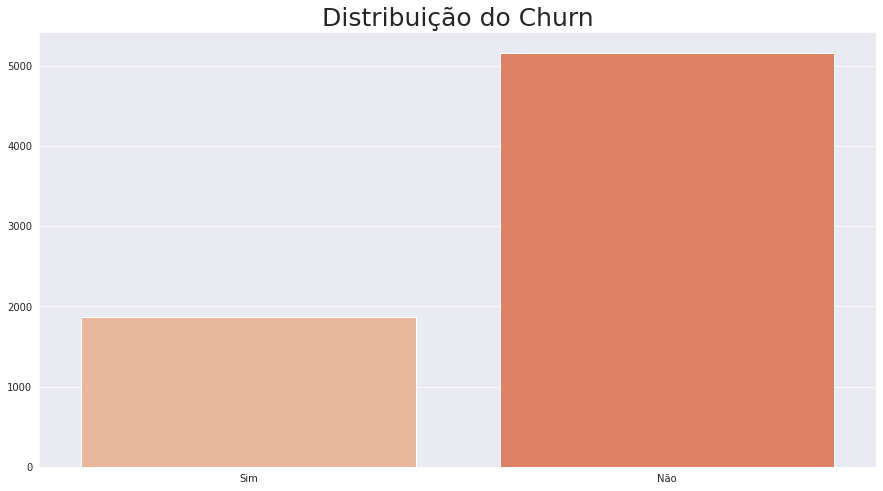

In [22]:
Sim = len(dados.query('Churn == 1')['Churn'])
Nao = len(dados.query('Churn == 0')['Churn'])
Categoria = ['Sim', 'Não']

plt.figure(figsize=(15,8))

sns.barplot(x=Categoria, y=[Sim, Nao])
plt.title('Distribuição do Churn', fontsize=25)


<AxesSubplot:title={'center':'Cobrança por Gênero e o Churn em cada categoria'}, xlabel='Gênero', ylabel='Cobrança Total'>

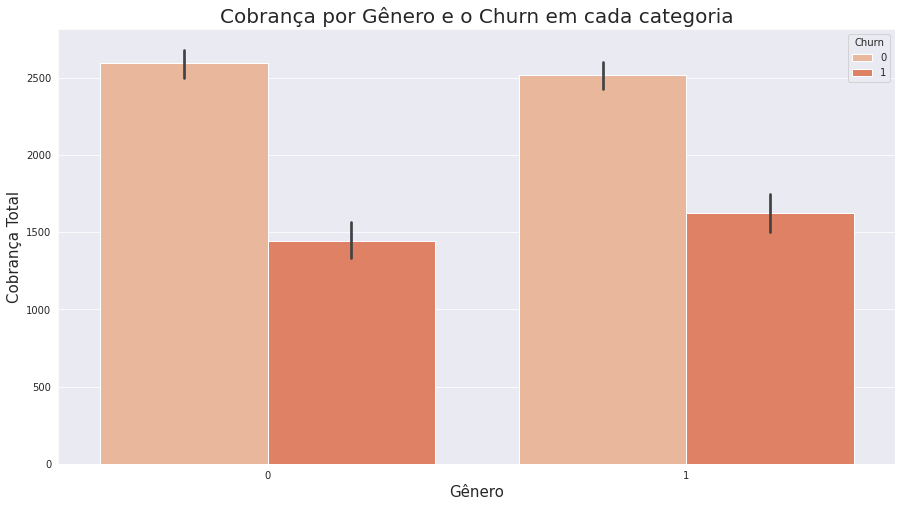

In [23]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=dados, x='Genero', y='Cobranca_Total', hue='Churn')
plt.title('Cobrança por Gênero e o Churn em cada categoria', fontsize=20)
ax.set_xlabel('Gênero', fontsize=15)
ax.set_ylabel('Cobrança Total', fontsize=15)

ax